# 1. statistic

In [3]:
import cv2,os
import numpy as np

p = '../malaria_small/cell_data/d7581cb0-7a12-471d-a3d8-68dcea362213___10___red_blood_cell.png'
# read image
img = cv2.imread(p, cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOR
print(img.shape)



(116, 115, 3)


In [11]:
from tqdm import *

width_list = []
height_list = []

p1 = '../malaria_small/cell_data/'
for p2 in tqdm(os.listdir(p1)):
    p3 = os.path.join(p1,p2)
    img = cv2.imread(p3, cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOR
    w = img.shape[0]
    h = img.shape[1]
    width_list.append(w)
    height_list.append(h)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5765/5765 [00:09<00:00, 584.74it/s]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f14f0e5d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14f0e5d8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14f0eccdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14f0e69040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14f0e693d0>],
 'means': []}

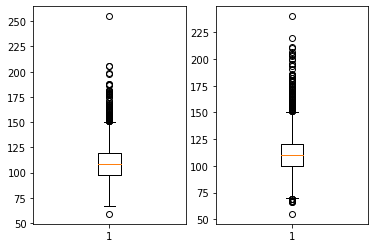

In [12]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.boxplot(width_list)

plt.subplot(122)
plt.boxplot(height_list)


# 2. resize

In [19]:
p1 = '../malaria_small/cell_data/'
for p2 in tqdm(os.listdir(p1)):
    p3 = os.path.join(p1,p2)
    img = cv2.imread(p3, cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOdim = (width, height)
    # resize image
    dim = (120,120)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4)
    filename_dst = p3.replace("cell_data","cell_data_resize")
    cv2.imwrite( filename_dst, resized )

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5765/5765 [00:20<00:00, 278.95it/s]


# 3. dataset

In [25]:
p1 = '../malaria_small/cell_data_resize/'
label_to_count = {}
for p2 in tqdm(os.listdir(p1)):
    p3 = os.path.join(p1,p2)
    label = p3.split('___')[2].split('.')[0]
    if label not in label_to_count:
        label_to_count[label] = 0
    label_to_count[label]+=1
    
print(label_to_count)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5765/5765 [00:00<00:00, 408104.01it/s]

{'red_blood_cell': 5541, 'difficult': 38, 'trophozoite': 107, 'gametocyte': 18, 'ring': 36, 'leukocyte': 7, 'schizont': 18}


In [ ]:
import joblib as jl
import numpy as np

category_to_int = {'red_blood_cell': 0, 'difficult': 1, 'schizont': 2, 'ring': 3, 'trophozoite': 4, 'gametocyte': 5, 'leukocyte': 6}


x_data = []
y_data = []

p1 = '../malaria_small/cell_data_resize/'
for p2 in tqdm(os.listdir(p1)):
    p3 = os.path.join(p1,p2)
    img = cv2.imread(p3, cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOdim = (width, height)
    label = p3.split('___')[2].split('.')[0]
    y = category_to_int[label]
    x_data.append(img)
    y_data.append(y)
    
    
x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape, y_data.shape)

 34%|███████████████████████████████████████▌                                                                            | 1964/5765 [00:03<00:06, 545.58it/s]